In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data= pd.read_csv('Folds5x2_pp.csv')
num_rows= data.shape[0]
print ('Number of rows=', num_rows)

Number of rows= 47840


In [3]:
counter_nan= data.isnull().sum()
counter_without_nan= counter_nan[counter_nan==0]
data= data[counter_without_nan.keys()]

In [4]:
data.columns= ['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity', 'Output']
data.head()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.describe()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


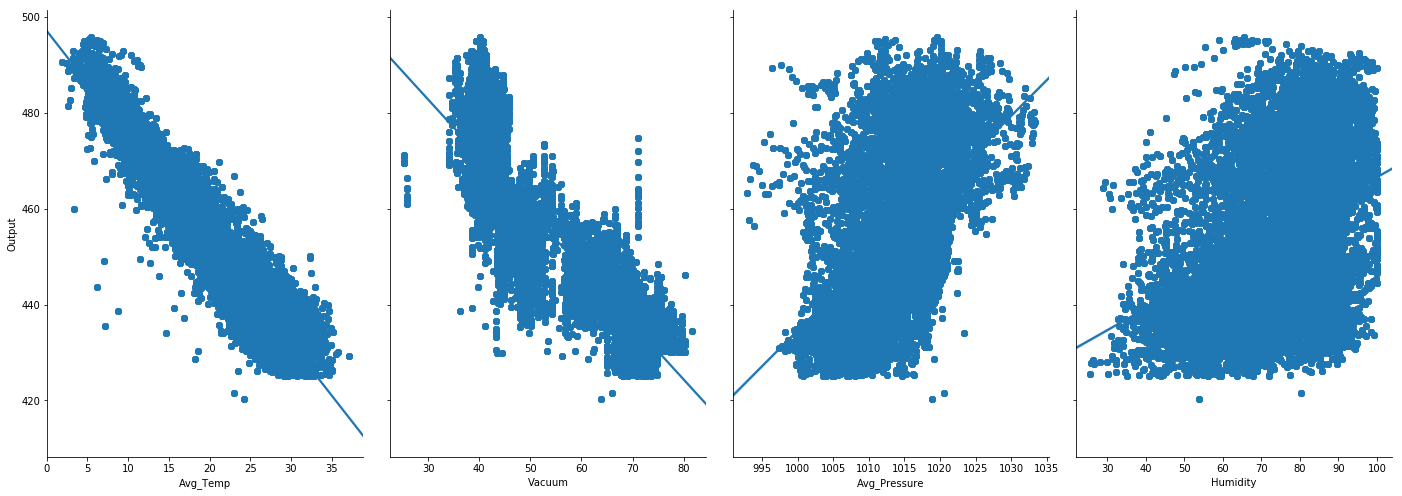

In [24]:
sb.pairplot(data, x_vars=['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity'], y_vars='Output',height=7, aspect=0.7, kind='reg')

 ## Prepare for One variable

In [7]:
print (data.corr()) 

              Avg_Temp    Vacuum  Avg_Pressure  Humidity    Output
Avg_Temp      1.000000  0.844107     -0.507549 -0.542535 -0.948128
Vacuum        0.844107  1.000000     -0.413502 -0.312187 -0.869780
Avg_Pressure -0.507549 -0.413502      1.000000  0.099574  0.518429
Humidity     -0.542535 -0.312187      0.099574  1.000000  0.389794
Output       -0.948128 -0.869780      0.518429  0.389794  1.000000


In [42]:
X = data['Avg_Temp'].values.reshape(-1,1)
y = data['Output'].values.reshape(-1,1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
reg= LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = reg.predict(X_test)

In [46]:
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.8991563157354803
Mean Absolute Error: 4.255253824973504
Mean Squared Error: 28.970517905485085
Root Mean Squared Error: 5.382426767312778


In [47]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 4.256e+05
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:51:20   Log-Likelihood:            -1.4878e+05
No. Observations:               47840   AIC:                         2.976e+05
Df Residuals:                   47838   BIC:                         2.976e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.070   7105.209      0.0

## Prepare for Multivariable

In [53]:
X = data[['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity']].values
y = data['Output'].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred = regressor.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.929460673799225
Mean Absolute Error: 3.585560841621615
Mean Squared Error: 20.264638560606432
Root Mean Squared Error: 4.501626212893117


In [41]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.558e+05
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:49:42   Log-Likelihood:            -1.4044e+05
No. Observations:               47840   AIC:                         2.809e+05
Df Residuals:                   47835   BIC:                         2.809e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      4.359    104.298      0.0